In [1]:
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt

C:\Users\Usuario\AppData\Local\Temp\ipykernel_34104\4065067221.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ruta_local = 'G:'

In [3]:
path_shp_recorridos = ruta_local + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\RECORRIDOS.shp'
path_shp_plan = ruta_local + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\SHP\PLANIFICACION.shp'
path_xlsx_parte = ruta_local + r'\Ingenio Azucarero Guabira S.A\UTEA - SEMANAL - EQUIPO AVIACION UTEA\Pulverizacion\2025\parte_diario_pulverizacion.xlsx'

In [4]:
# Cargar los archivos Shapefile
gdf_recorridos = gpd.read_file(path_shp_recorridos)
gdf_plan = gpd.read_file(path_shp_plan)

In [6]:
idd = 15

In [7]:
selec_recorridos = gdf_recorridos[gdf_recorridos['idd']==idd]

In [8]:
selec_plan = gdf_plan[gdf_plan['idd'] == idd]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_34104\2512288014.py:8: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


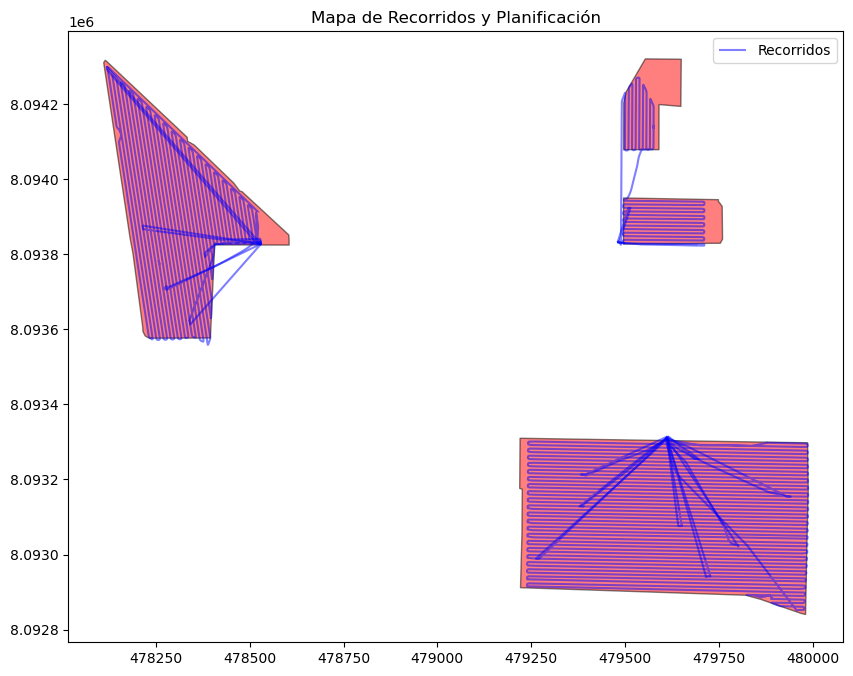

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
# Graficar las capas
selec_recorridos.plot(ax=ax, color="blue", alpha=0.5, edgecolor="black", label="Recorridos")
selec_plan.plot(ax=ax, color="red", alpha=0.5, edgecolor="black", label="Planificación")

# Configurar la visualización
ax.set_title("Mapa de Recorridos y Planificación")
ax.legend()

# Mostrar el gráfico
plt.show()

In [10]:
selec_recorridos["fecha"] = pd.to_datetime(selec_recorridos["fecha"])

C:\Users\Usuario\anaconda3\envs\utea\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [11]:
# Obtener la fecha mínima y máxima
fecha_min = selec_recorridos["fecha"].min()
fecha_max = selec_recorridos["fecha"].max()
fecha_intermedia = fecha_min + (fecha_max - fecha_min) / 2

In [12]:
# Convertir las fechas al formato dd/mm/aaaa
fecha_min_str = fecha_min.strftime("%d/%m/%Y")
fecha_max_str = fecha_max.strftime("%d/%m/%Y")
fecha_intermedia_str = fecha_intermedia.strftime("%d/%m/%Y")
# Obtener el número de semana de la fecha intermedia
numero_semana = fecha_intermedia.isocalendar().week

In [13]:
area_total_pulv = selec_recorridos['area'].sum()
area_total_pulv

49.53933358103

In [14]:
fecha_min

Timestamp('2025-03-16 00:00:00')

In [15]:
fecha_max

Timestamp('2025-03-16 00:00:00')

In [16]:
fecha_intermedia

Timestamp('2025-03-16 00:00:00')

In [17]:
numero_semana

11

In [18]:
num_vuelos = len(selec_recorridos)
num_vuelos

19

In [19]:
selec_recorridos.head(3)

,file,fecha,hora,id,drone,ctrl_id,pilot,fl_time,mode,height,spacing,fl_speed,area,spray,idd,geometry
236,T50-1_20250316132731_R2559925352.kml,2025-03-16,13:27:31,R2559925352,T50-1,1581F6BUB24630011R08,Aurelio Garcia,9:08,Auto,4.0,9.5,29.880001,3.210667,32.256,15,"LINESTRING (479613.496 8093314.631, 479614.578..."
237,T50-1_20250316133956_R2640015540.kml,2025-03-16,13:39:56,R2640015540,T50-1,1581F6BUB24630011R08,Aurelio Garcia,9:29,Auto,4.0,9.5,29.880001,3.399333,34.129,15,"LINESTRING (479613.739 8093315.025, 479696.757..."
238,T50-1_20250316135608_R2700083181.kml,2025-03-16,13:56:08,R2700083181,T50-1,1581F6BUB24630011R08,Aurelio Garcia,9:57,Auto,4.0,9.5,29.880001,3.456000,34.699,15,"LINESTRING (479613.843 8093314.800, 479603.324..."


In [20]:
# Convert "fl_time" to total seconds
selec_recorridos["fl_time_sec"] = selec_recorridos["fl_time"].apply(lambda x: int(x.split(":")[0]) * 60 + int(x.split(":")[1]))
# Sum all seconds
total_seconds = selec_recorridos["fl_time_sec"].sum()
# Convert back to hh:mm:ss format
hours = total_seconds // 3600
minutes = (total_seconds % 3600) // 60
seconds = total_seconds % 60
total_flight_time = f"{hours:02}:{minutes:02}:{seconds:02}"
total_flight_time

C:\Users\Usuario\anaconda3\envs\utea\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


'02:38:59'

In [21]:
total_caudal = selec_recorridos['spray'].sum()
total_caudal

498.357

In [22]:
df_parte = pd.read_excel(path_xlsx_parte)

In [23]:
df_parte['FECHA'] = pd.to_datetime(df_parte['FECHA'], errors='coerce')
df_parte['HORA DE INICIO'] = pd.to_datetime(df_parte['HORA DE INICIO'], errors='coerce')
df_parte['HORA FINAL'] = pd.to_datetime(df_parte['HORA FINAL'], errors='coerce')

In [24]:
df_parte.head(3)

,Nº DE LABOR,FECHA,SEMANA,INSTITUCION,COD CANERO,NOMBRE CANERO,COD PROPIEDAD,NOMBRE PROPIEDAD,LOTE,HECTAREA,...,OS,TEMP MAX,TEMP MIN,TIPO CULTIVO,TIPO DESARROLLO,NUM VUELOS,HORAS VUELO,TOTAL CAUDAL,idd,AREA PULVERIZADO
0,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L31,30.260942,...,1,25.0,20.0,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1.0,28.633271
1,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,EP-L16,23.216246,...,1,25.0,20.0,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1.0,21.664272
2,PA-2025-1,2025-03-07,10.0,50,41594,AGROPECUARIA CAMPO DULCE S.R.L.,30,CAMPO DULCE,ER-L6,19.683505,...,1,25.0,20.0,CAÑA DE AZUCAR,MADURACION,104.0,15:03:42,2952.664,1.0,19.160233


In [25]:
# extraer primer dato de temp max
temp_max = df_parte[df_parte['idd'] == idd]['TEMP MAX'].iloc[0]
temp_min = df_parte[df_parte['idd'] == idd]['TEMP MIN'].iloc[0]

In [26]:
temp = round((temp_max + temp_min) / 2)
temp

26

In [27]:
# Aplicar el buffer a la geometría
selec_recorridos["geometry"] = selec_recorridos.geometry.buffer(5.5)

C:\Users\Usuario\anaconda3\envs\utea\lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [28]:
# Disolver todas las geometrías en un solo polígono
buffer_dissolved = selec_recorridos.dissolve()

In [29]:
buffer_dissolved

,geometry,file,fecha,hora,id,drone,ctrl_id,pilot,fl_time,mode,height,spacing,fl_speed,area,spray,idd,fl_time_sec
0,"MULTIPOLYGON (((479497.099 8093823.715, 479496...",T50-1_20250316132731_R2559925352.kml,2025-03-16,13:27:31,R2559925352,T50-1,1581F6BUB24630011R08,Aurelio Garcia,9:08,Auto,4.0,9.5,29.880001,3.210667,32.256,15,548


In [30]:
# Calcular la intersección
interseccion = gpd.overlay(buffer_dissolved, selec_plan, how="intersection")

In [31]:
# Calcular el área de cada polígono de la intersección
interseccion["area_rociado"] = interseccion.geometry.area / 10000

In [32]:
resumen = interseccion[['id_2', 'unidad_05', 'area_2', 'area_rociado']].copy()

In [33]:
# Calcular el total de area_2
total_area_2 = resumen["area_2"].sum()
total_area_rociado = resumen["area_rociado"].sum()
# Crear una nueva columna con el porcentaje
resumen["porcen_rociado"] = (resumen["area_rociado"] / total_area_2)

In [34]:
diferencia = total_area_rociado - area_total_pulv
diferencia

-0.16422368488270678

In [35]:
resumen["area_diff"] = resumen["porcen_rociado"] * diferencia

In [36]:
resumen["area_rociado_ajustado"] = resumen["area_rociado"] - resumen["area_diff"]

In [37]:
resumen = resumen[['id_2', 'unidad_05', 'area_2', 'area_rociado_ajustado']].copy()

In [38]:
total_area_rociado_ajustado = resumen["area_rociado_ajustado"].sum()
resumen["porcen_rociado"] = (resumen["area_rociado_ajustado"]) / (resumen["area_2"])

In [39]:
resumen["dif_area"] = resumen["area_2"] - resumen["area_rociado_ajustado"]

In [40]:
resumen

,id_2,unidad_05,area_2,area_rociado_ajustado,porcen_rociado,dif_area
0,57,N25,3.127608,2.613766,0.835708,0.513842
1,58,N23,2.707825,1.419276,0.524139,1.288549
2,59,N3,16.030289,15.034335,0.937870,0.995954
3,60,S3,31.245430,30.460405,0.974876,0.785025


In [41]:
for i, row in resumen.iterrows():
    df_parte.loc[(df_parte['ID'] == row['id_2']), 'AREA PULVERIZADO'] = row['area_rociado_ajustado']

In [42]:
df_parte.loc[(df_parte['idd'] == idd), 'FECHA'] = fecha_intermedia
df_parte.loc[(df_parte['idd'] == idd), 'SEMANA'] = numero_semana
df_parte.loc[(df_parte['idd'] == idd), 'HORA DE INICIO'] = fecha_min
df_parte.loc[(df_parte['idd'] == idd), 'HORA FINAL'] = fecha_max
df_parte.loc[(df_parte['idd'] == idd), 'TEMPERATURA'] = temp
df_parte.loc[(df_parte['idd'] == idd), 'NUM VUELOS'] = num_vuelos
df_parte.loc[(df_parte['idd'] == idd), 'HORAS VUELO'] = total_flight_time
df_parte.loc[(df_parte['idd'] == idd), 'TOTAL CAUDAL'] = total_caudal

In [43]:
output_path = path_xlsx_parte
df_parte.to_excel(output_path, index=False)